In [3]:
# 사이킷런 사용해서 타이타닉 생존자 예측하기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 시각화 패키지 matplotlib / seaborn

titanic_df = pd.read_csv('./train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
print('### info of data ###\n')
print(titanic_df.info())

### info of data ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [5]:
# Age,Cabin, Embarked에 null data 존재 확인 -> fillna로 채워주기
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('### number of null data set = ', titanic_df.isnull().sum().sum(), '###')

### number of null data set =  0 ###


In [6]:
# String type feature 값 분류 확인
print('### distribution of "Sex":\n', titanic_df['Sex'].value_counts())
print('\n### distribution of "Cabin":\n', titanic_df['Cabin'].value_counts())
print('\n### distribution of "Embarked":\n', titanic_df['Embarked'].value_counts())

### distribution of "Sex":
 male      577
female    314
Name: Sex, dtype: int64

### distribution of "Cabin":
 N                  687
C23 C25 C27          4
G6                   4
B96 B98              4
F2                   3
F33                  3
E101                 3
C22 C26              3
D                    3
E44                  2
D33                  2
D26                  2
E121                 2
B20                  2
C123                 2
C125                 2
C78                  2
B22                  2
B28                  2
C93                  2
B57 B59 B63 B66      2
D35                  2
C126                 2
E67                  2
B18                  2
B58 B60              2
F4                   2
C2                   2
F G73                2
C92                  2
                  ... 
D47                  1
A26                  1
E12                  1
C91                  1
D49                  1
D6                   1
C86                  1
B42            

In [7]:
# Cabin feature 데이터 분포 애매 -> 앞글자만 추출하기
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print('\n### distribution of "Cabin":\n', titanic_df['Cabin'].value_counts())


### distribution of "Cabin":
 N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


In [8]:
# 성별이 생존확률에 어떤 영향을 미치는지 확인해보기
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

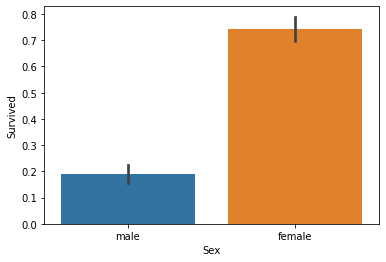

In [9]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

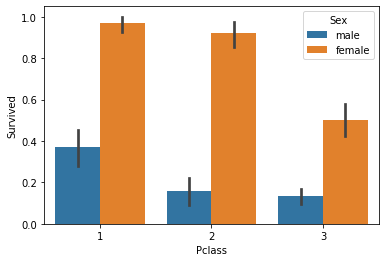

In [10]:
# 부자와 가난한자의 차이 확인(객실등급)
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

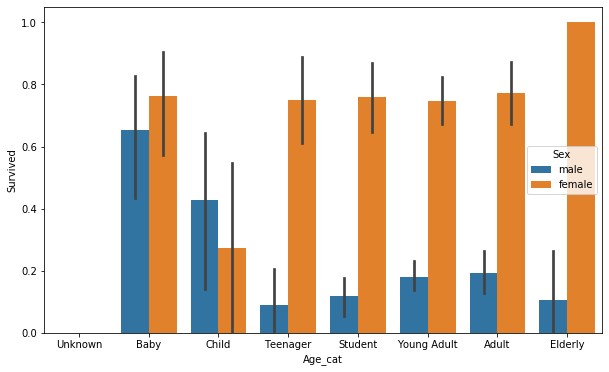

In [11]:
# 나이에 따른 생존확률 확인
def get_category(age):
    cat = ' '
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age<= 12: cat = 'Child'
    elif age<= 18: cat = 'Teenager'
    elif age<= 25: cat = 'Student'
    elif age<= 35: cat = 'Young Adult'
    elif age<= 60: cat = 'Adult'
    else : cat = 'Elderly'
    return cat

plt.figure(figsize=(10, 6))
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [12]:
# encoding
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [13]:
# 전처리과정 총 정리!
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df


# 불필요한 속성 제거 함수
def drop_features(df):
    df.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
    
    return df


# Label encoding 수행 함수
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Sex', 'Cabin', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    
    return df


# 전처리 함수 동시 수행 함수
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

In [15]:
# 다시 원본데이터 전처리
titanic_df = pd.read_csv('./train.csv')
y_df = titanic_df['Survived']
X_df = titanic_df.drop('Survived', axis=1)

X_df = transform_features(X_df)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=11)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

# Decision Tree
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier accuracy : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# Random Forest
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier accuracy : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# Logistic Regression
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression accuracy : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier accuracy : 0.7933
RandomForestClassifier accuracy : 0.8547
LogisticRegression accuracy : 0.8659


C:\Users\kjh58\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kjh58\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
# 교차검증으로 dt model 성능 심화 비교
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    iter_count = 0
    for train_index, test_index in kfold.split(X_df):
        X_train , y_train = X_df.values[train_index], y_df.values[train_index]
        X_test, y_test = X_df.values[test_index], y_df.values[test_index]
        
        clf.fit(X_train, y_train)
        clf_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, clf_pred)
        scores.append(accuracy)
        print("CV# {0} accuracy : {1:.4f}".format(iter_count, accuracy))
        iter_count += 1
        
    mean_score = np.mean(scores)
    print("Average accuracy : {0:.4f}".format(mean_score))
    
exec_kfold(dt_clf, folds=5)

CV# 0 accuracy : 0.7598
CV# 1 accuracy : 0.7697
CV# 2 accuracy : 0.7978
CV# 3 accuracy : 0.7472
CV# 4 accuracy : 0.8258
Average accuracy : 0.7800


In [25]:
# Cross_val_score 이용 -> Stratified Kfold 이용하기 때문에 accuracy 증가
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_df, y_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("CV# {0} accuracy : {1:.4f}".format(iter_count, accuracy))
    
print("Average accuracy : {0:.4f}".format(np.mean(scores)))

CV# 0 accuracy : 0.7542
CV# 1 accuracy : 0.7765
CV# 2 accuracy : 0.8090
CV# 3 accuracy : 0.7865
CV# 4 accuracy : 0.8362
Average accuracy : 0.7925


In [28]:
# GridSearchCV 이용
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10], 'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('Best GridSearchCV parameter :', grid_dclf.best_params_)
print('Best GridSearchCV accuracy :', grid_dclf.best_score_)

best_dclf = grid_dclf.best_estimator_

# 최적 하이퍼 파라미터로 학습된 estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('Final accuracy : {0:.4f}'.format(accuracy))

Best GridSearchCV parameter : {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best GridSearchCV accuracy : 0.7991573033707865
Final accuracy : 0.8715


C:\Users\kjh58\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
